In [1]:
#importando pandas e matplot
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
#Upando arquivos para o Colab
from google.colab import files
arq = files.upload()

In [10]:
#Criando DataFrame
df = pd.read_excel("/content/drive/My Drive/dataset/Cusro_Python_Pandas_Digital_Innovation-master/datasets/AdventureWorks.xlsx")
df.head()


,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [11]:
#Receita Total
df['Valor Venda'].sum()

5984606.1426

In [15]:
#Custo total
df['Custo'] = df['Custo Unitário'].mul(df['Quantidade'])
round(df['Custo'].sum(),2)

2486783.05

In [17]:
#Lucro total
df['Lucro'] = df['Valor Venda'] - df['Custo']
round(df['Lucro'].sum(),2)

3497823.09

In [21]:
#Tempo de envio
df['Tempo_Envio'] = df['Data Envio'] - df['Data Venda']
#Extraindo os dias
df['Tempo_Envio'] = (df['Data Envio'] - df['Data Venda']).dt.days

In [23]:
#Media de tempo de envio por marca
df.groupby(df['Marca'])['Tempo_Envio'].mean()


Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_Envio, dtype: float64

In [24]:
#Verificação de valores nulos
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo_Envio       0
dtype: int64

In [29]:
#Agrupando por ano e marca
df.groupby([df['Data Venda'].dt.year, "Marca"])['Lucro'].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [28]:
# Modificando os valores com notação cientifica
pd.options.display.float_format = '{:20,.2f}'.format

In [30]:
#Criar uma tabela com os valores acima
lucro_ano = df.groupby([df['Data Venda'].dt.year, "Marca"])['Lucro'].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [31]:
#Quantidade de itens vendidos
df.groupby(df['Produto'])["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

Text(0, 0.5, 'Produto')

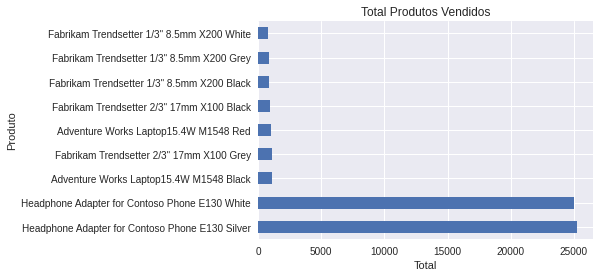

In [32]:
#Grafico total itens vendidos
df.groupby(df['Produto'])["Quantidade"].sum().sort_values(ascending=False).plot.barh(title="Total Produtos Vendidos")
plt.xlabel('Total')
plt.ylabel('Produto')

Text(0, 0.5, 'Receita')

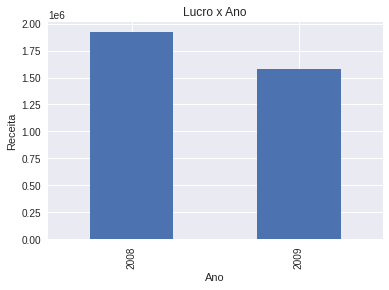

In [33]:
#Grafico Lucro x Ano
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().plot.bar(title = 'Lucro x Ano')
plt.xlabel("Ano")
plt.ylabel("Receita")

In [34]:
#Vendas por ano
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

In [35]:
#selecionando ano de 2009
df_2009 = df[df['Data Venda'].dt.year == 2009]

Text(0, 0.5, 'Lucro')

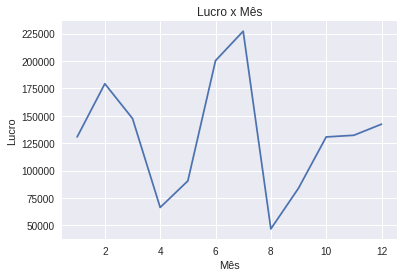

In [36]:
#Venda por mes ano 2009
df_2009.groupby(df_2009['Data Venda'].dt.month)["Lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro")

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

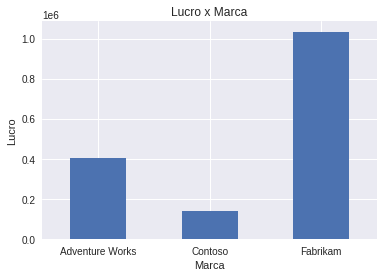

In [39]:
#Lucro po Marca em 2009
df_2009.groupby(df_2009['Marca'])["Lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal' )

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

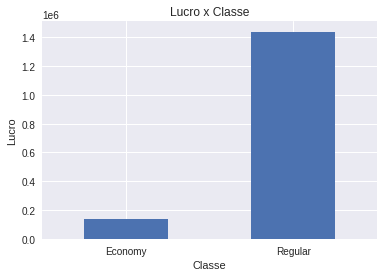

In [40]:
#Lucro x Classe em 2009
df_2009.groupby(df_2009['Classe'])["Lucro"].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal' )


In [41]:
#Tempo de Envio - Analise completa
df["Tempo_Envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_Envio, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x7f0413c18eb8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0413ba79b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0413baf518>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0413baf160>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0413ba7240>,
  <matplotlib.lines.Line2D at 0x7f0413ba75f8>]}

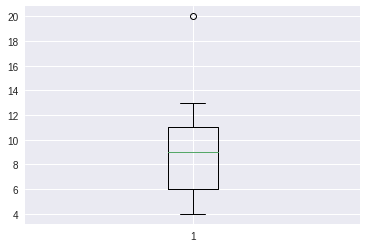

In [42]:
#Gráfico BoxPlot
plt.boxplot(df["Tempo_Envio"])

(array([217., 137.,  70., 179., 115., 185.,   0.,   0.,   0.,   1.]),
 array([ 4. ,  5.6,  7.2,  8.8, 10.4, 12. , 13.6, 15.2, 16.8, 18.4, 20. ]),
 <a list of 10 Patch objects>)

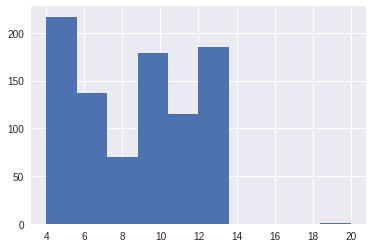

In [43]:
#Histograma
plt.hist(df["Tempo_Envio"])

In [44]:
#Tempo minimo de envio
df['Tempo_Envio'].min()

4

In [45]:
#Tempo maximo de envio
df['Tempo_Envio'].max()

20

In [46]:
#Detecção de Outlier
df[df['Tempo_Envio']==20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [47]:
df.to_csv('df_vendas_novo.csv', index=False)